# Fig_10 : Rest-frame distributions of $\tau$, and $SF_{\infty}$
    
Moved from `code2/Compare_Celerite_Chelsea_real_fits.ipynb`. 
The old version (using `sns.kdeplot` with standard levels) that was in the paper version submitted in Noveber 2019 is kept there. 

This version uses an updated version that takes part of sns.distributions code, and uses it to find the Kernel Density Estimate, and custom-written modules to find levels that enclose 68%, 95^, 99.7% of all data (to mark equivalents of 1,2,3-$\sigma$ levels) 

In [2]:
import modules as mod
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
import os
import pandas as pd 
from astropy.table import Table
from matplotlib import rcParams 
import seaborn as sns
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [5]:
mod.cumsum_contour_levels??

6373  of  8516
6327  of  8516


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.683, 0.955]

how many input datapoints are within each outline
6086/6327, i.e. 96.19%
4466/6327, i.e. 70.59%


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)



Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.683, 0.955]

how many input datapoints are within each outline
6078/6327, i.e. 96.06%
4456/6327, i.e. 70.43%

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.683, 0.955]

how many input datapoints are within each outline
6075/6316, i.e. 96.18%
4440/6316, i.e. 70.30%


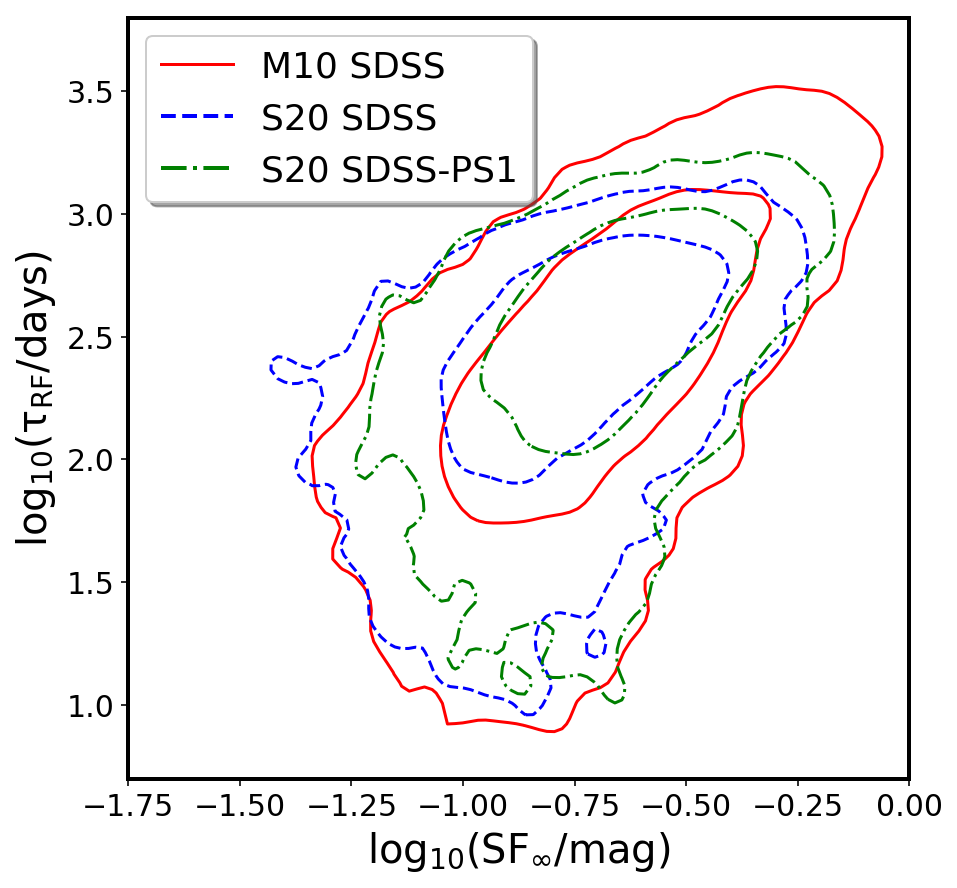

In [8]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 190409 : the "raw" SDSS+  offset gri PS1 to SDSSr (real_combined_r/ )
# 190606 : the "cleaned" SDSS with 6-sigma algorithm + PS1 r  (real_sdss_ps1r_dr2_cleaned/)
# 190930 : the "raw" SDSS + PS1 r  (real_sdss_ps1r_dr2/ )
# 190807 : the "cleaned NEW" SDSS+PS1 after better cleaning algorithm 
# (real_sdss_ps1r_dr2_cleaned_NEW/)
date = '190807'# '190606'
s82r = Table.read('../code2/'+date+'_Celerite_real_Jeff1_Shen2008-2011_s82drw_r.txt',
                  format='ascii')
m2 = s82r['Plike'] - s82r['Pnoise'] > 2 
m3 = s82r['Plike'] - s82r['Pinf'] > 0.05 
m4 = s82r['edge'] == 0 
m = m2&m3&m4


# do the same selection as Chelsea
m1 = (s82r['log10sigmahat'] > -10)*(s82r['log10tau'] > -10)
m2 = s82r['Plike'] - s82r['Pnoise'] > 2 
m3 = s82r['Plike'] - s82r['Pinf'] > 0.05 
m4 = s82r['edge'] == 0 
m = m1&m2&m3&m4
print(np.sum(m), ' of ', len(m))
# choose the same extent as Fig.3 MacLeod+2010 
extent = [-1.5,0, 0,5]

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax_legend_handles = []


# Plot Chelsea's results ( s82rdrw...  - only r-band )
# # assuming tau is obs : conv to restframe by dividing by redshift
red = 'REDSHIFT' # use redshift from Shen2011 ideally ... 
tobs = np.power(10,s82r['log10tau'])
trest = tobs / (1+s82r[red])

x = np.log10(s82r['SFinf'])
y = np.log10(trest) 

mx = (extent[0] < x) * (x < extent[1])
my = (extent[2] < y) * (y < extent[3])

m = mx&my&m1&m2&m3&m4 
print(np.sum(m), ' of ', len(m))

# plot the KDE contours 
c = 'r' ;  ls = '-'
xx, yy, z = mod._statsmodels_bivariate_kde(x[m], y[m],'scott',100,3,None)
levels = mod.cumsum_contour_levels(z,inputLevels=[0.683, 0.955])
outline = ax.contour(xx,yy,z , levels = levels, colors=c,
                    linestyles=ls, linewidth=2)
mod.count_points_inside_contour(x[m],y[m],outline) 
line = mlines.Line2D([], [],  color=c,ls=ls, label='M10 SDSS')
ax_legend_handles.append(line)


# # Plot Celerite results ... 
lss = ['--', '-.']   ;   lw = 2    ;  i = 0 
for seg,color  in zip(['sdss','sdss-ps1'], ['blue','green']):
    sfinf = np.sqrt(2) * s82r['sigmaEXP_'+seg]
    tauOBS = s82r['tauEXP_'+seg]
    tauRF = tauOBS / (1+s82r[red])
    x = np.log10(sfinf)
    y = np.log10(tauRF)
    m5 = tauOBS > 2
    m = mx&my&m1&m2&m3&m4&m5
    #ax.scatter(x[m], y[m], s=0.05) 
    xx, yy, z = mod._statsmodels_bivariate_kde(x[m], y[m],'scott',100,3,None)
    levels = mod.cumsum_contour_levels(z,inputLevels=[0.683, 0.955])
    outline = ax.contour(xx,yy,z , levels = levels, colors=color,
                        linestyles=lss[i], linewidth=lw)
    mod.count_points_inside_contour(x[m],y[m],outline)
    line = mlines.Line2D([], [],  color=color, lw=lw, ls=lss[i],
                         label='S20 '+seg.upper())
    ax_legend_handles.append(line)
    i += 1 

ax.legend(loc='upper left', handles = ax_legend_handles, bbox_to_anchor=(0,1),
            ncol=1, fancybox=True, shadow=True, fontsize=18 ) 

ax.set_xlabel(r'$\log_{10}{(\mathrm{SF_{\infty}/mag})}$')
ax.set_ylabel(r'$\log_{10}{(\mathrm{\tau_{\mathrm{RF}}/ days})}$')
#ax.set_xlim(-2.4, .5)
ax.set_xlim(-1.75,0)
#ax.set_ylim(0,4.)
ax.set_ylim(0.7,3.8)
plt.savefig('Fig10_restframe_tau_SF_'+date+'_.pdf', 
             bbox_inches='tight', dpi=100)